In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd

In [6]:
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [12]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
session = Session(engine)

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text xticklabel objects>)

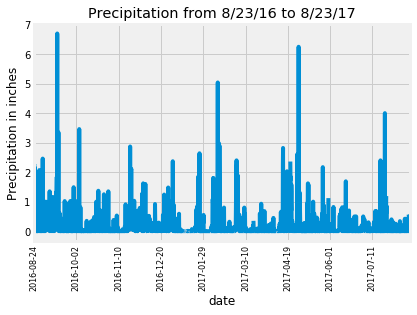

In [30]:
recent_Date = (session.query(Measurement.date)
                     .order_by(Measurement.date.desc())
                     .first())

recent_Date = list(np.ravel(recent_Date))[0]

recent_Date = dt.datetime.strptime(recent_Date, '%Y-%m-%d')

recent_Year = int(dt.datetime.strftime(recent_Date, '%Y'))
recent_Month = int(dt.datetime.strftime(recent_Date, '%m'))
recent_Day = int(dt.datetime.strftime(recent_Date, '%d'))

yr_Before = dt.date(recent_Year, recent_Month, recent_Day) - dt.timedelta(days=365)

Precip_Data = (session.query(Measurement.date, Measurement.prcp)
                  .filter(Measurement.date > yr_Before)
                  .order_by(Measurement.date)
                  .all())

Precip_Table = pd.DataFrame(Precip_Data)
Precip_Table = Precip_Table.set_index('date')

Precip_Table = Precip_Table.sort_index(ascending=True)

Precip_Table.plot(title="Precipitation from 8/23/16 to 8/23/17", legend= None)
plt.ylabel("Precipitation in inches")
plt.xticks(fontsize = 8, rotation = 90)

In [20]:
Precip_Table = pd.DataFrame(Precip_Data)
Precip_Table


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [31]:
Precip_Table.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [38]:
station_Counts = (session.query(Measurement.station, func.count(Measurement.station))
                        .group_by(Measurement.station)
                        .order_by(func.count(Measurement.station).desc())
                        .all())
station_Counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

# Exploratory Climate Analysis

In [39]:
#just to be sure
stations_Count = session.query(Station).count()
print(stations_Count)

9


In [42]:
station_ID = station_Counts[0][0]

station_Name = (session.query(Station.name)
                      .filter_by(station = station_ID))
station_Name = station_Name[0][0]

print(f"Most active station - {station_ID}: {station_Name}.")

high_Temp = (session.query(Measurement.tobs)
                      .filter(Measurement.station == stationID)
                      .order_by(Measurement.tobs.desc())
                      .first())

high_Temp = high_Temp[0]
print(f"High temperature: {high_Temp} degrees Farenheit.")

low_Temp = (session.query(Measurement.tobs)
                     .filter(Measurement.station == station_ID)
                     .order_by(Measurement.tobs.asc())
                     .first())

low_Temp = low_Temp[0]

print(f"Low temperature: {low_Temp} degrees Farenheit.")

avg_Temp = (session.query(func.avg(Measurement.tobs))
                  .filter(Measurement.station == station_ID))

avg_Temp = '{0:.3}'.format(avg_Temp[0][0])

print(f"Average temperature: {avg_Temp} degrees Farenheit.")

Most active station - USC00519281: WAIHEE 837.5, HI US.
High temperature: 85.0 degrees Farenheit.
Low temperature: 54.0 degrees Farenheit.
Average temperature: 71.7 degrees Farenheit.


Text(0, 0.5, 'Frequency')

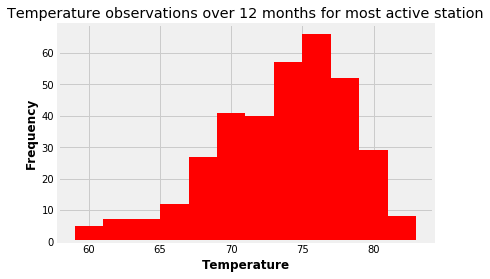

In [45]:
temp_Holder = (session.query(Measurement.date, Measurement.tobs)
                   .filter(Measurement.date > yr_Before)
                   .filter(Measurement.station == station_ID)
                   .order_by(Measurement.date)
                   .all())

temp_Table = pd.DataFrame(temp_Holder)
temp_Table.set_index('date')

temp_Table = temp_Table.sort_index(ascending=True)

temp_Table.plot(kind='hist', bins=12, color='red', legend=None)
plt.title("Temperature observations over 12 months for most active station")
plt.xlabel("Temperature", weight = 'bold')
plt.ylabel("Frequency", weight = 'bold')

In [46]:
def get_temp(start_date, end_date):
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

trip_Start = '2017-07-11'
trip_End = '2017-07-22'

tripTemps = get_temp(trip_Start, trip_End)

tripTemps

[(72.0, 78.33333333333333, 83.0)]

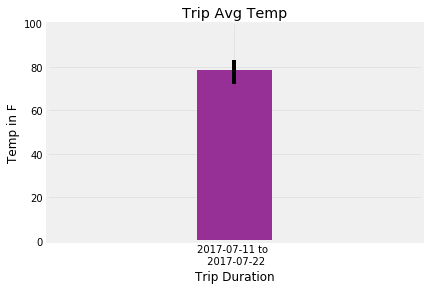

In [57]:
trip_Min = tripTemps[0][0]
trip_Avg = tripTemps[0][1]
trip_Max = tripTemps[0][2]

min_Err = trip_Avg - trip_Min
max_Err = trip_Max - trip_Avg

trip = "2017-07-11 to \n 2017-07-22"
error_Bar = np.array([[min_Err], [max_Err]])

plt.bar(trip, trip_Avg, yerr=error_Bar, color = 'purple', alpha = .8)
plt.ylim(0, 100)
plt.xlim(-2, 2)
plt.title('Trip Avg Temp')
plt.ylabel('Temp in F')
plt.xlabel("Trip Duration")
plt.grid(alpha=.35)

In [82]:
qry = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp), 
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

rain_Station = (session.query(*qry)
                   .filter(Station.station == Measurement.station)
                   .filter(Measurement.date >= trip_Start)
                   .filter(Measurement.date <= trip_End)
                   .group_by(Station.station)
                   .order_by(func.sum(Measurement.prcp).desc())
                   .all())

#convert query object to data frame
rain_Station_Table = pd.DataFrame(np.array(rain_Station))
#rename columns
rain_Station_Table = rain_Station_Table.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precip", 3: "Lat", 
                                                    4: "Long", 5: "Elevation"})


rain_Station_Table.dtypes
rain_Station_Table.astype({'Total Precip': 'float64', 'Elevation': 'float64'}).dtypes
rain_Station_Table
#np.round(rain_Station_Table['Elevation'], decimals = 2)


,Station,Location,Total Precip,Lat,Long,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",9.870000000000001,21.3331,-157.8025,152.4
1,USC00519281,"WAIHEE 837.5, HI US",1.5700000000000003,21.45167,-157.84888999999998,32.9
2,USC00513117,"KANEOHE 838.1, HI US",0.8400000000000001,21.4234,-157.8015,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.82,21.5213,-157.8374,7.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.44,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.25,21.2716,-157.8168,3.0
6,USC00517948,"PEARL CITY, HI US",0.0,21.3934,-157.9751,11.9


In [99]:
def dailys(date):
    qry = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*qry).filter(func.strftime("%m-%d", Measurement.date) == date).all()

start_Date = "2017-07-11"
end_Date = "2017-07-22"

start_Int = int(start_Date[-2:])
end_Int = int(end_Date[-2:])
trip_Len = end_Int - start_Int + 1

start_Date = dt.datetime.strptime(start_Date, '%Y-%m-%d')
dates = [dt.datetime.strftime(start_Date + dt.timedelta(days = r), '%m-%d') 
            for r in range(0, trip_Len)]

tripx = [dailys(d) for d in dates]

tripx

[[(70.0, 75.78947368421052, 81.0)],
 [(67.0, 75.96491228070175, 82.0)],
 [(69.0, 76.1896551724138, 81.0)],
 [(61.0, 76.2280701754386, 82.0)],
 [(68.0, 76.2542372881356, 82.0)],
 [(70.0, 76.34482758620689, 83.0)],
 [(70.0, 76.30188679245283, 83.0)],
 [(72.0, 76.63793103448276, 83.0)],
 [(68.0, 75.89090909090909, 83.0)],
 [(69.0, 75.46296296296296, 82.0)],
 [(69.0, 76.9245283018868, 83.0)],
 [(69.0, 75.78846153846153, 81.0)]]

In [100]:
tripx = [np.array(x[0]) for x in tripx]

xTable = pd.DataFrame(tripx)
#add date column
xTable["Date"] = dates
#set index and rename columns
xTable = xTable.set_index("Date")
xTable = xTable.rename(columns={0: "Low Temp", 1: "Avg Temp", 2: "High Temp"})

xTable

,Low Temp,Avg Temp,High Temp
Date,,,
07-11,70.0,75.789474,81.0
07-12,67.0,75.964912,82.0
07-13,69.0,76.189655,81.0
07-14,61.0,76.228070,82.0
07-15,68.0,76.254237,82.0
07-16,70.0,76.344828,83.0
07-17,70.0,76.301887,83.0
07-18,72.0,76.637931,83.0
07-19,68.0,75.890909,83.0


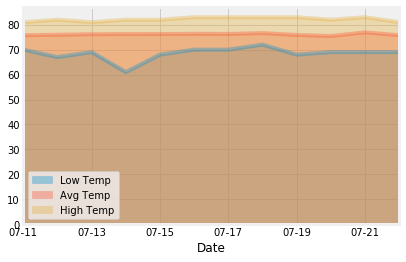

In [101]:
xTable.plot.area(stacked=False, alpha=.35)
